In [2]:
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

# Статистика 01.04 - 05.04

Сравниваем, как изменяется распределение со временем

In [49]:
!head data/ab_main_page_response_time.tsv

128	3	219	2020-04-06	24678
128	3	220	2020-04-06	24678
128	3	177	2020-04-06	24678
237	3	197	2020-04-06	24208
248	2	234	2020-04-06	24208
248	2	179	2020-04-06	24208
248	2	169	2020-04-06	24208
248	2	227	2020-04-06	24208
248	2	147	2020-04-06	24208
289	2	235	2020-04-06	24208


In [59]:
import numpy as np

df_long_term = pd.read_csv(
    'data/ab_main_page_response_time.tsv',
    header=None,
    sep='\t',
    names=['uid', 'ab_group', 'response_time', 'dt', 'app_version', 'rsyslog_timestamp'],
    dtype={'uid': np.uint64, 'ab_group':  np.uint8, 'response_time': np.uint16, 'app_version': np.uint16,
           'rsyslog_timestamp': np.uint64},
    parse_dates=['dt']
)

df_long_term.head(5)

,uid,ab_group,response_time,dt,app_version,rsyslog_timestamp
0,128,3,219,2020-04-06,24678,1586193155
1,128,3,220,2020-04-06,24678,1586203739
2,128,3,177,2020-04-06,24678,1586193180
3,237,3,197,2020-04-06,24208,1586223281
4,248,2,234,2020-04-06,24208,1586219472


Общее количество событий

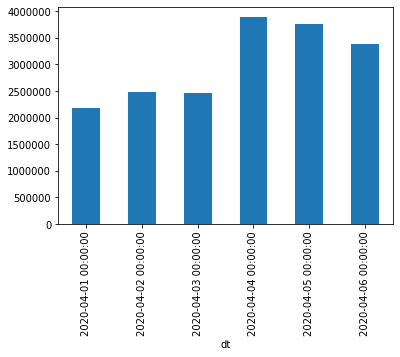

In [65]:
df_long_term.groupby(['dt'])['uid'].count().sort_index().plot.bar()

Проверяем, что в группах одинаковое количество записей

In [66]:
df_long_term.ab_group.value_counts(normalize=True)

3    0.335908
2    0.334420
1    0.329673
Name: ab_group, dtype: float64

Строим 95% перцентиль времени ответа

In [86]:
def filter_ab_group(df: pd.DataFrame, ab_group: int) -> pd.DataFrame:
    return df[df['ab_group']==ab_group]

q_95_dict = {}
for i in range(1,4):
    q_95 = filter_ab_group(df_long_term, i)['response_time'].quantile(q=0.95)
    q_95_dict[i] = q_95
    print(f"group={i}, q_95={q_95}")

group=1, q_95=353.0
group=2, q_95=392.0
group=3, q_95=412.0


group_id = 1


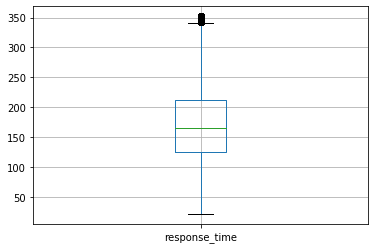

In [101]:
group_id = 1
group_1 = filter_ab_group(df_long_term, group_id)
print(f"group_id = {group_id}")
trunk_df = group_1
trunk_df[trunk_df['response_time'] < q_95_dict[group_id]][['response_time']].boxplot()

group_id = 2


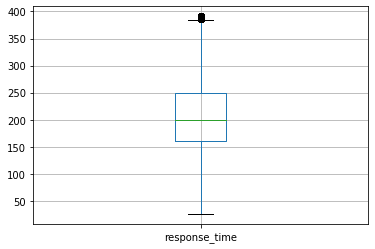

In [98]:
group_id = 2
group_2 = filter_ab_group(df_long_term, group_id)
print(f"group_id = {group_id}")
trunk_df = filter_ab_group(df_long_term, group_id)
trunk_df[trunk_df['response_time'] < q_95_dict[group_id]][['response_time']].boxplot()

group_id = 3


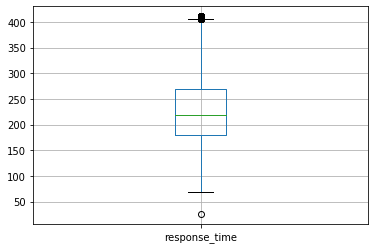

In [99]:
group_id = 3
group_3 = filter_ab_group(df_long_term, group_id)
print(f"group_id = {group_id}")
trunk_df = filter_ab_group(df_long_term, group_id)
trunk_df[trunk_df['response_time'] < q_95_dict[group_id]][['response_time']].boxplot()

Проверяем стабильность 95% перцентили по дням в каждой группе

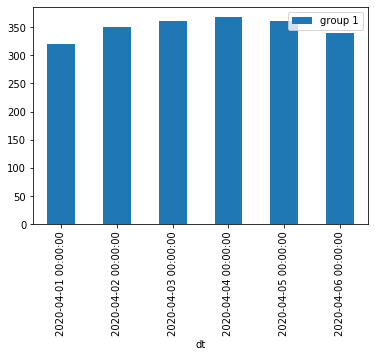

In [102]:
ax = (
    group_1
    .groupby('dt')['response_time']
    .quantile(q=0.95)
    .sort_index()
    .plot
    .bar(label='group 1', legend=True)
)

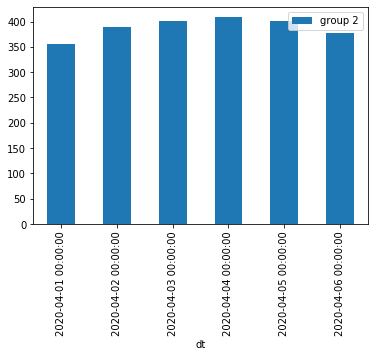

In [103]:
ax = (
    group_2
    .groupby('dt')['response_time']
    .quantile(q=0.95)
    .sort_index()
    .plot
    .bar(label='group 2', legend=True)
)

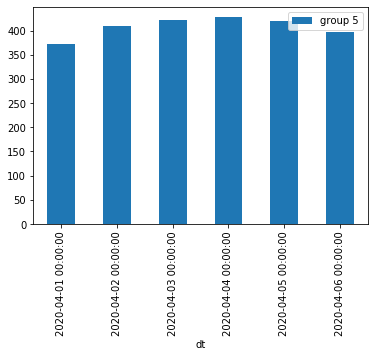

In [104]:
ax = (
    group_3
    .groupby('dt')['response_time']
    .quantile(q=0.95)
    .sort_index()
    .plot
    .bar(label='group 5', legend=True)
)

Визуализация

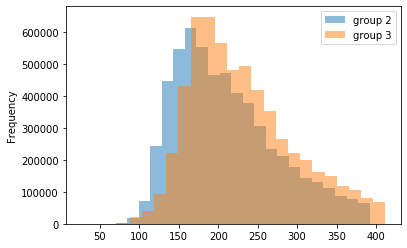

In [107]:
# не пацанская калибровка
group_id = 2
ax = group_2[
    group_2['response_time'] <= q_95_dict[group_id]
]['response_time'].plot(kind='hist', alpha=0.5, bins=25, label='group 2', legend=True)

# пацанская калибровка
group_id = 3
group_3[
    group_3['response_time'] <= q_95_dict[group_id]
]['response_time'].plot(kind='hist', alpha=0.5, bins=25, label='group 3', legend=True)

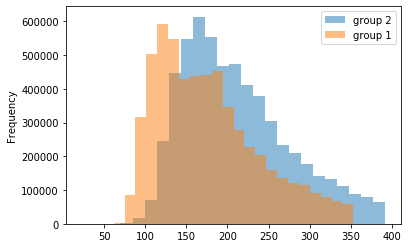

In [112]:
# обычная калибровка
group_id = 2
ax = group_2[
    group_2['response_time'] <= q_95_dict[group_id]
]['response_time'].plot(kind='hist', alpha=0.5, bins=25, label='group 2', legend=True)

# без калибровки
group_id = 1
ax = group_1[
    group_1['response_time'] <= q_95_dict[group_id]
]['response_time'].plot(kind='hist', alpha=0.5, bins=25, label='group 1', legend=True)

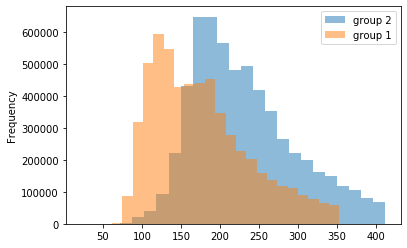

In [113]:
# пацанская калибровка
group_id = 3
ax = group_3[
    group_3['response_time'] <= q_95_dict[group_id]
]['response_time'].plot(kind='hist', alpha=0.5, bins=25, label='group 2', legend=True)

# без калибровки
group_id = 1
ax = group_1[
    group_1['response_time'] <= q_95_dict[group_id]
]['response_time'].plot(kind='hist', alpha=0.5, bins=25, label='group 1', legend=True)

Различия в медианах

In [111]:
print(f"group_2={group_2.response_time.median()}, group_3={group_3.response_time.median()}")
print(f"group_1={group_1.response_time.median()}, group_3={group_3.response_time.median()}")
print(f"group_1={group_1.response_time.median()}, group_2={group_2.response_time.median()}")

group_2=204.0, group_3=223.0
group_1=170.0, group_3=223.0
group_1=170.0, group_2=204.0
